In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_loader import DataLoader
from stepdetect import LRTStepChangeDetector
from reactor_volume import BioreactorVolumeCalculator
from utils import combine_online_and_offline_data, sort_time_data, calculate_time_intervals
%load_ext autoreload
%autoreload 2

In [2]:
path = r"C:\Projects\bioreactor_volume\data\meassurements.xlsx"
 
loader = DataLoader(path=path)
online_df = loader.load_online_data(sheet_name="online")
offline_df = loader.load_offline_data(sheet_name="offline")

In [3]:
time = np.array(online_df['time_h'])
offline_samples = np.array(offline_df)
feeding_data = np.array(online_df.drop(columns=['time_h']))
feeding_data.shape

(17146, 5)

In [4]:
# Maximum liklehood test parameters
delta=1
min_size=0.01

In [5]:
detector = LRTStepChangeDetector(delta=delta, min_size=min_size)
addition_indices = detector.apply_to_streams(feeding_data)

In [6]:
addition_indices[0]

array([860], dtype=int64)

In [8]:
calculator = BioreactorVolumeCalculator(initial_volume=1000.0, F_in=0, F_out=0)

In [9]:
feeding_data.shape

(17146, 5)

In [10]:
online_feedings = calculator.calculate_stream_volume(time, feeding_data, addition_indices)

In [11]:
combined_data = combine_online_and_offline_data(online_feedings, offline_samples)

In [12]:
sorted_material_addition_matrix = sort_time_data(combined_data)

In [13]:
sampling_intervals = calculate_time_intervals(time)

In [14]:
working_volume = calculator.calculate_volume(time=time, sampling_intervals=sampling_intervals, material_addition_matrix=sorted_material_addition_matrix)

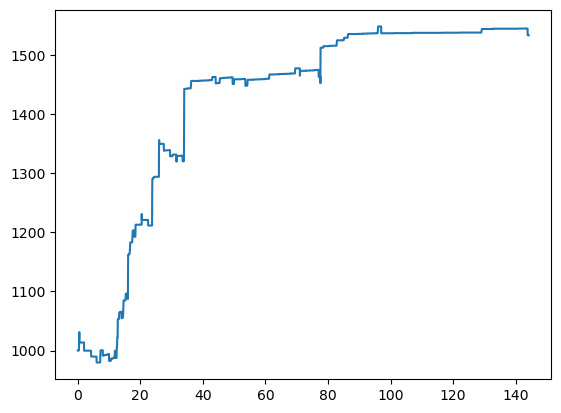

In [15]:
plt.plot(time, working_volume)
plt.show()